In [36]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
addict                        2.4.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
aliyun-python-sdk-core        2.13.36
aliyun-python-sdk-kms         2.16.0
antlr4-python3-runtime        4.8
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
async-timeout                 4.0.2
asynctest                     0.13.0
attrs                         22.1.0
audioread                     3.0.0
autopep8                      2.0.0
av                            10.0.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bitarray                      2.6.0
bleach                        5.0.1


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

In [22]:
#欧式距离计算
def euclidDistance(x1, x2, sqrt_flag=True):
    res = np.sum((x1-x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res
#初始化聚类中心
def init_k_node(data,k):
    data =list(data)
    return random.sample(data,k)
#讲各节点分配给聚类中心
def get_clusters(data,k_centroids):
    cluster_dict =dict() #用来存储每个类别对应的节点信息
    k=len(k_centroids) #可获取设定的聚类个数
    labels = []
    for node in data:
        cluster_idx=-1 #设定初始类别为-1
        min_dis=float("inf") #设定初始聚类中心
        for idx in range(k): #计算节点同每个初始聚类中心的距离
            centroid=k_centroids[idx]
            distance =euclidDistance(node,centroid)
            if distance < min_dis:
                min_dis =distance
                cluster_idx=idx
                
        #存储每个类别包含的样本
        labels.append(cluster_idx)
        if cluster_idx not in cluster_dict.keys():
            cluster_dict[cluster_idx] = []
        cluster_dict[cluster_idx].append(node)
    return labels, cluster_dict

# 重新计算聚类中心
def get_centroids(cluster_dict):
    new_k_centroids=[]
    for cluster_idx in cluster_dict.keys():
        new_centroid = np.mean(cluster_dict[cluster_idx],axis=0)#每个类别中的均值
        new_k_centroids.append(new_centroid)
    return new_k_centroids
#计算各类间方差
def get_variance(centroids,cluster_dict):
    sum=0.0 #初始化均方误差为0
    for cluster_idx  in cluster_dict.keys():
        centroid = centroids[cluster_idx] #获取聚类中心
        distance= 0.0
        for node  in  cluster_dict[cluster_idx]:
            distance += euclidDistance(node,centroid)
        sum+=distance
    return sum
def kmeans(data, k):
    centroids=init_k_node(data,k) #获取初始聚类中心
    _, cluster_dict=get_clusters(data,centroids) #初始分类
    new_var=get_variance(centroids,cluster_dict) #计算初始聚类均方差
    old_var=1
    
    #设定条件，当两次聚类得误差小于某个值时，说明聚类基本稳定：
    while abs(new_var-old_var)>=0.00001:
        centroids =get_centroids(cluster_dict)
        labels, cluster_dict=get_clusters(data,centroids)
        old_var=new_var
        new_var=get_variance(centroids,cluster_dict)
        
    return labels, centroids,cluster_dict

print("以上为K-means聚类代码")

以上为K-means聚类代码


In [23]:
df = pd.read_csv('car_price.csv')
# 使用af保存原始数据
af = df.copy()
# 以下各列指定数值进行转化
df['cylindernumber']=df.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['doornumber']=df.doornumber.replace({'two':2,'four':4})

# 以下各列转为离散数字编码
# df['CarName'] = pd.Categorical(df['CarName']).codes
df['fueltype'] = pd.Categorical(df['fueltype']).codes
df['aspiration'] = pd.Categorical(df['aspiration']).codes
df['doornumber'] = pd.Categorical(df['doornumber']).codes
df['carbody'] = pd.Categorical(df['carbody']).codes
df['drivewheel'] = pd.Categorical(df['drivewheel']).codes
df['enginelocation'] = pd.Categorical(df['enginelocation']).codes
df['enginetype'] = pd.Categorical(df['enginetype']).codes
# df['cylindernumber'] = pd.Categorical(df['cylindernumber']).codes
df['fuelsystem'] = pd.Categorical(df['fuelsystem']).codes

nf = df.copy()
df.drop(columns=['CarName'], inplace=True)
df.drop(columns=['car_ID'], inplace=True)
# 去掉无关列

df = df.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
# 数据归一化
# print('数据归一化后的df如下')
data = np.array(list(df.to_numpy()))
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,1.0,0.0,0.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,1.0,0.0,0.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,1.0,0.0,0.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,...,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,1.0,0.0,1.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,...,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,1.0,0.0,1.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,...,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,1.0,0.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.2,1.0,1.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.708333,...,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.2,1.0,0.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.2,0.0,1.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


In [24]:
# 模型评价指标计算
from sklearn.metrics import davies_bouldin_score

# Silhouette Coefficient Index

def get_silhouette_coefficient(X, labels):
    n_clusters = np.unique(labels).shape[0]
    s = []
    for k in range(n_clusters):  # 遍历每一个簇
        index = (labels == k)  # 取对应簇所有样本的索引
        x_in_cluster = X[index]  # 去对应簇中的所有样本
        for sample in x_in_cluster:  # 计算每个样本的轮廓系数
            a = ((sample - x_in_cluster) ** 2).sum(axis=1)
            a = np.sqrt(a).sum() / (len(a) - 1)  # 去掉当前样本点与当前样本点的组合计数
            nearest_cluster_id = None
            min_dist2 = np.inf
            for c in range(n_clusters):  # 寻找距离当前样本点最近的簇
                if k == c:
                    continue
                centroid = X[labels == c].mean(axis=0)
                dist2 = ((sample - centroid) ** 2).sum()
                if dist2 < min_dist2:
                    nearest_cluster_id = c
                    min_dist2 = dist2
            x_nearest_cluster = X[labels == nearest_cluster_id]
            b = ((sample - x_nearest_cluster) ** 2).sum(axis=1)
            b = np.sqrt(b).mean()
            s.append((b - a) / np.max([a, b]))
    return np.mean(s)

# Calinski-Harabasz Index

def get_calinski_harabasz(X, labels):
    n_samples = X.shape[0]
    n_clusters = np.unique(labels).shape[0]
    betw_disp = 0.  # 所有的簇间距离和
    within_disp = 0.  # 所有的簇内距离和
    global_centroid = np.mean(X, axis=0)  # 全局簇中心
    for k in range(n_clusters):  # 遍历每一个簇
        x_in_cluster = X[labels == k]  # 取当前簇中的所有样本
        centroid = np.mean(x_in_cluster, axis=0)  # 计算当前簇的簇中心
        within_disp += np.sum((x_in_cluster - centroid) ** 2)
        betw_disp += len(x_in_cluster) * np.sum((centroid - global_centroid) ** 2)
    return (1. if within_disp == 0. else
            betw_disp * (n_samples - n_clusters) /
            (within_disp * (n_clusters - 1.)))

# Davies-Bouldin Index
def get_davies_bouldin(X, labels):
    n_clusters = np.unique(labels).shape[0]
    centroids = np.zeros((n_clusters, len(X[0])), dtype=float)
    s_i = np.zeros(n_clusters)
    for k in range(n_clusters):  # 遍历每一个簇
        x_in_cluster = X[labels == k]  # 取当前簇中的所有样本
        centroids[k] = np.mean(x_in_cluster, axis=0)  # 计算当前簇的簇中心
        s_i[k] = euclidDistance(x_in_cluster, [centroids[k]]).mean()  #
    centroid_distances = euclidDistance(centroids)  # [K,K]
    combined_s_i_j = s_i[:, None] + s_i  # [K,k]
    centroid_distances[centroid_distances == 0] = np.inf
    scores = np.max(combined_s_i_j / centroid_distances, axis=1)
    return np.mean(scores)

print('以上为评价指标计算')

以上为评价指标计算


In [27]:
# kmeans聚类结果
for i in range(3, 8, 1):
    kmeanLabels, _, _=kmeans(data, i)
    # data = data[kmeanLabels!=-1]
    labels_v = np.array(kmeanLabels)
    # print(data)
    # print(labels_v)
    
    print(i)
    print(f"轮廓系数: {get_silhouette_coefficient(data, labels_v)}")
    print(f"方差比: {get_calinski_harabasz(data, labels_v)}")
    print(f"DB指数: {davies_bouldin_score(data, labels_v)}")

3
轮廓系数: 0.23458413120885327
方差比: 58.34609696950351
DB指数: 1.4637732046745722
4
轮廓系数: 0.2607057834207957
方差比: 59.702497627594916
DB指数: 1.4294188106767873
5
轮廓系数: 0.2792133881347782
方差比: 53.902431340694406
DB指数: 1.3552092484604263
6
轮廓系数: 0.26723182507816945
方差比: 60.04944271542309
DB指数: 1.3656359776974227
7
轮廓系数: 0.18162242833639874
方差比: 46.848717070914326
DB指数: 1.5901921317260173


In [35]:
print('由上述参数实验可知，选择簇数为4最优')

由上述参数实验可知，选择簇数为4最优


In [50]:
# kmeans自定义实现
kmeanLabels, _, _=kmeans(data, 4)
data_v = data[kmeanLabels!=-1]
labels_v = np.array(kmeanLabels)
print(data_v)
print(labels_v)

[[[1.         1.         0.         ... 0.22222222 0.28947368 0.20795889]
  [1.         1.         0.         ... 0.22222222 0.28947368 0.28255797]
  [0.6        1.         0.         ... 0.16666667 0.26315789 0.28255797]
  ...
  [0.2        1.         0.         ... 0.13888889 0.18421053 0.40631051]
  [0.2        0.         1.         ... 0.36111111 0.28947368 0.43076312]
  [0.2        1.         1.         ... 0.16666667 0.23684211 0.43461099]]]
[0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 2 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 0 1 1 0 2 2 2 2 2 0 0 0 0 2 1 2 1 3 1 1 3 3 3 3 3 1 0 1
 0 0 2 2 2 0 0 2 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 1 3 1 3
 1 3 1 3 1 3 1 2 0 2 2 2 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 2 2 2 1 1 1 1 1 1 1
 1 1 2 2 2 1 1 1 2 2 3 3 2 2 2 2 2 0 0 0 0 0 0 0 0 1 3 1 1 1 0 0 1 1 2 0 3
 1 1 3 1 0 0 1 3 1 1 1 1 1 1 1 1 1 1 3 1]


In [51]:
print(f"轮廓系数: {get_silhouette_coefficient(data, labels_v)}")
print(f"方差比: {get_calinski_harabasz(data, labels_v)}")
print(f"DB指数: {davies_bouldin_score(data, labels_v)}")

轮廓系数: 0.25812004778865044
方差比: 61.86714736309223
DB指数: 1.286482250008101


In [48]:
# kmeans使用第三方库实现
km = KMeans(n_clusters=4,random_state=888)
result = km.fit_predict(data)
print(result)

[1 1 1 0 0 1 2 2 2 1 1 2 1 2 2 2 2 2 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 2 2 2 1 1 1 0 0 1 1 1 1 1 0 1 0 3 0 2 3 3 3 3 3 2 1 2
 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 3 1 0 0 1 1 0 0 1 0 0 2 2 2 1 1 1 2 3 2 3
 2 3 2 3 2 3 2 1 1 0 0 0 0 1 1 1 1 1 2 0 1 1 0 1 0 1 2 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 3 3 0 0 0 1 1 1 1 1 1 1 1 1 1 0 3 0 0 0 1 1 2 2 3 1 3
 0 0 3 0 1 1 0 3 0 2 2 2 2 2 2 2 2 2 3 2]


In [49]:
print(f"轮廓系数: {get_silhouette_coefficient(data, result)}")
print(f"方差比: {get_calinski_harabasz(data, result)}")
print(f"DB指数: {davies_bouldin_score(data, result)}")

轮廓系数: 0.27789378322483343
方差比: 64.0746670910635
DB指数: 1.2215406656235248


四类的ID:

No.0 [  1   2   3   6  10  11  13  17  30  47  50  59  73  75  76  81  83  84
  85 105 106 107 125 126 127 128 129 130 132 133 137 168 169 170 171 172
 173 179 180]

No.1 [  4   5  12  21  25  26  27  29  36  37  40  41  42  44  46  54  55  61
  63  64  65  86  87  88  89  93  94  97  98 100 101 121 122 123 124 131
 134 136 142 143 144 145 146 147 148 149 150 153 154 155 156 157 158 159
 160 161 162 163 174 176 177 178 185 186 187 188 189 192 194]

No.2 [  7   8   9  14  15  16  18  48  49  66  67  68  69  70  71  72  74 102
 103 104 108 109 110 111 112 113 114 115 116 117 118 138 175 181 182 193
 195 196 197 198 199 200 201 202 203 204 205]

No.3 [ 19  20  22  23  24  28  31  32  33  34  35  38  39  43  45  51  52  53
  56  57  58  60  62  77  78  79  80  82  90  91  92  95  96  99 119 120
 135 139 140 141 151 152 164 165 166 167 183 184 190 191]

四类的产品名:

No.0 ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi fox', 'audi 5000s (diesel)', 'bmw 320

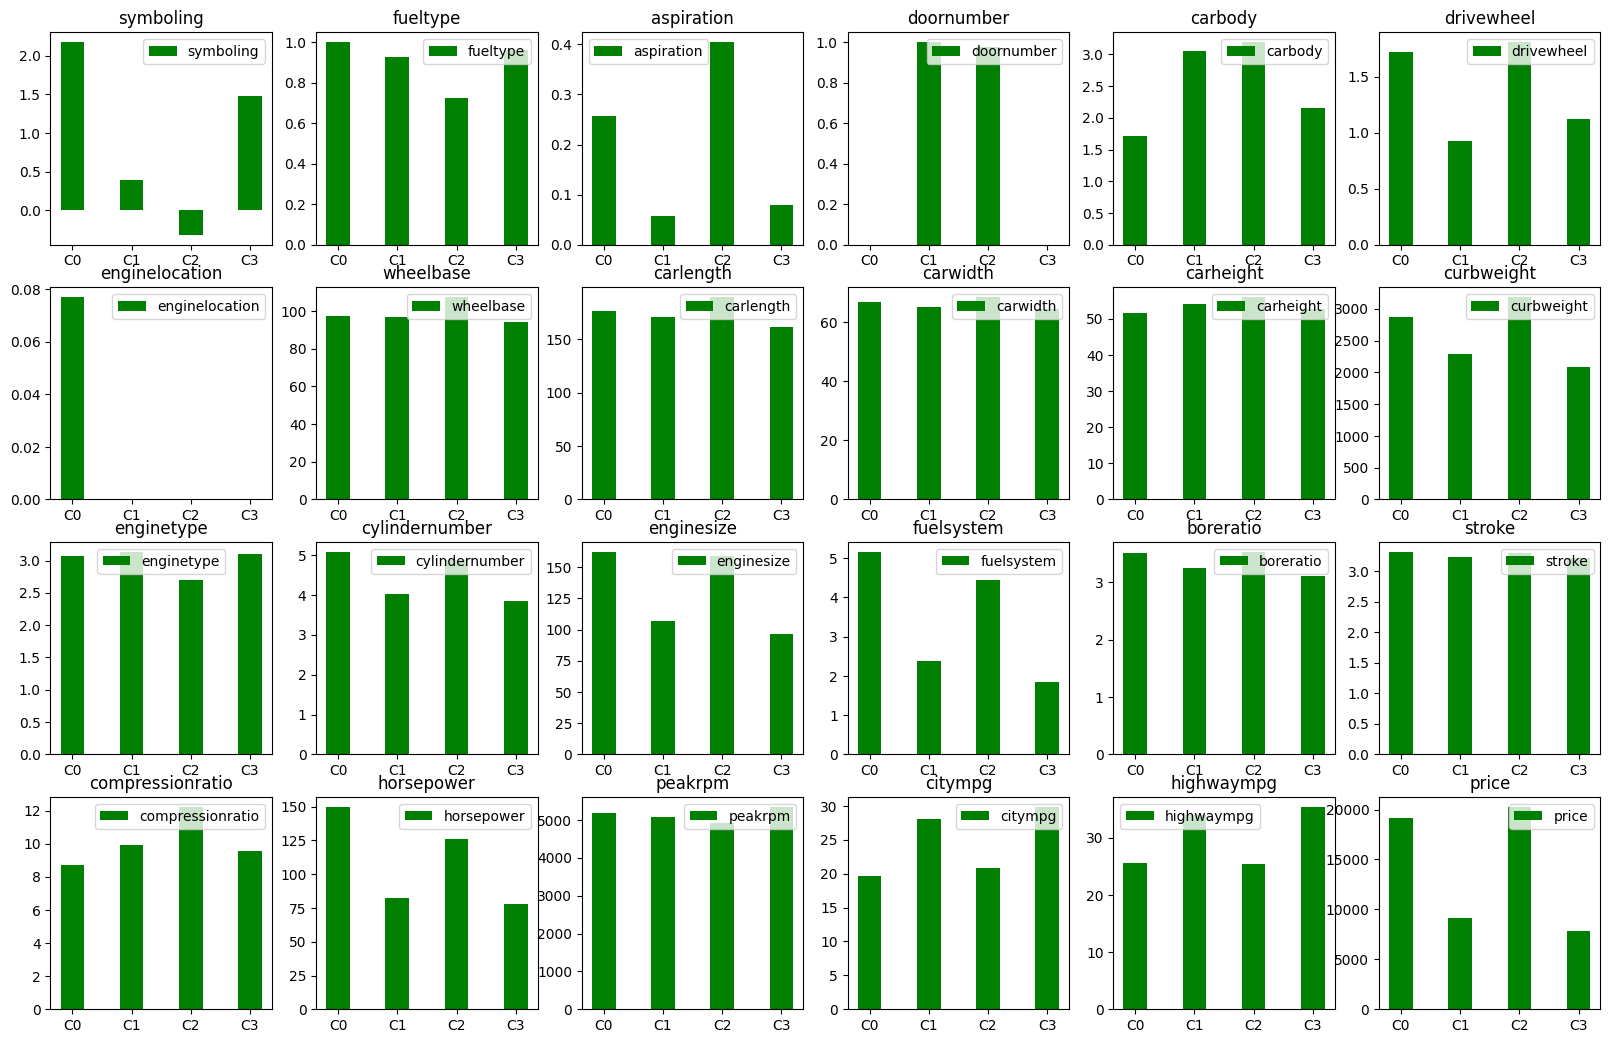

In [34]:
XLabel = ['C0', 'C1', 'C2', 'C3']
UselessColumn = ['car_ID', 'CarName']
# Car = pd.read_csv('car_price.csv')
labels_valid = labels_v
Car = nf
Car = Car.copy().iloc[labels!=-1, :]
CarCluster = pd.concat([Car, pd.DataFrame(labels_valid)], axis=1)
CarCluster.rename({0:'Class'}, axis=1, inplace=True)
CategoryColumn = CarCluster.select_dtypes(include = 'object').columns

print('四类的ID:')
print()
for i in range(4):
    label = CarCluster.loc[CarCluster['Class']==i]
    da = np.array(list(label['car_ID'].to_numpy()))
    print("No.{}".format(i), da)
    print()
print('四类的产品名:')
print()
for i in range(4):
    label = CarCluster.loc[CarCluster['Class']==i]
    da = list(label['CarName'].to_numpy())
    print("No.{}".format(i), da)
    print()

print("每一类的平均特征如下")
# Mean = CarCluster.drop(UselessColumn, axis=1).drop(CategoryColumn, axis=1).groupby('Class').mean()
Mean = CarCluster.drop(UselessColumn, axis=1).groupby('Class').mean()
plt.figure(figsize=(20, 16))
n = 1
for i in Mean.columns:
    plt.subplot(5, 6, n)
    X = list(range(len(XLabel)))
    plt.bar(X, Mean[i], width = 0.4, label = i, tick_label = XLabel, fc = 'green')
    plt.title(i)
    n += 1
    plt.legend()
plt.show()